### Practice from https://www.w3resource.com/python-exercises/pandas/datetime/index.php

In [1]:
import datatable as dt
import pandas as pd
import datetime

df = dt.fread('ufo_sighting_data.csv').to_pandas()
date_columns = ['Date_time', 'date_documented']
for col in date_columns:
    df[col] = pd.to_datetime(df[col].str.replace('24:00', '00:00'))
df = df.dropna(axis=0, subset=['Date_time'])

In [2]:
# 1. Write a Pandas program to create the today's date.
print(f'The current time is {datetime.datetime.now()}')

The current time is 2021-11-29 23:19:34.336773


In [3]:
from datetime import date

# 2. Write a Pandas program to calculate all the sighting days of the unidentified flying object (ufo) from current date.
df['until_now'] = pd.Timestamp.now().normalize() - df['Date_time']

In [4]:
pd.Timestamp.now()

Timestamp('2021-11-29 23:19:34.369804')

In [5]:
# Write a Pandas program to get the current date, oldest date and number of days between Current date and oldest date of Ufo dataset.
print(f"Today's date: {date.today()}")
print(f"The oldest date: {df['Date_time'].max()}")
print(f"Difference: {pd.Timestamp.today().normalize() - df['Date_time'].max()}")

Today's date: 2021-11-29
The oldest date: 2014-05-08 18:45:00
Difference: 2761 days 05:15:00


In [6]:
# 4. Write a Pandas program to get all the sighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*40 days).
df[df['until_now'] <= pd.Timedelta(days=365 * 40)]

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,until_now
35,1982-10-10 07:00:00,gisborne (new zealand),,,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,2002-01-11,-38.662334,178.017649,14294 days 17:00:00
36,1984-10-10 05:00:00,houston,tx,us,circle,60,1 minute,2 experience with unkown,2012-04-18,29.763055599999997,-95.363056,13563 days 19:00:00
37,1984-10-10 12:00:00,traverse city,mi,us,other,120,couple minutes,translucent football seen over city airport,2003-10-07,44.7630556,-85.620556,13563 days 12:00:00
38,1984-10-10 22:00:00,white plains,ny,us,formation,20,15-20 seconds,Saw a hugh object in sky with lights intermitt...,1999-08-10,41.0338889,-73.763333,13563 days 02:00:00
39,1985-10-10 20:25:00,leeds (uk/england),,gb,triangle,600,10min,three light in the sky that led to a big black...,2003-03-04,53.800000000000004,-1.583333,13198 days 03:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.1658333,-86.784444,3002 days 02:45:00
80328,2013-09-09 22:00:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.6136111,-116.202500,3002 days 02:00:00
80329,2013-09-09 22:00:00,napa,ca,us,other,1200,hour,Napa UFO&#44,2013-09-30,38.2972222,-122.284444,3002 days 02:00:00
80330,2013-09-09 22:20:00,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.9011111,-77.265556,3002 days 01:40:00


In [7]:
# 5. Write a Pandas program to get all the sighting days of the unidentified flying object (ufo) between 1950-10-10 and 1960-10-10.
df[(date(1950, 10, 10) <= df['Date_time'].dt.date) & (df['Date_time'].dt.date <= date(1960, 10, 10))]

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,until_now
2,1955-10-10 17:00:00,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,24156 days 07:00:00
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,23790 days 03:00:00
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,22329 days 04:00:00
480,1952-10-01 03:30:00,fukuoka (japan),,,disk,1200,about 20 mins,UFO seen by multiple U. S. military personnel;...,2006-12-07,33.590354999999995,130.401716,25260 days 20:30:00
481,1952-10-01 12:00:00,kansas city,mo,us,disk,90,90 sec.,1952 daylight sighting of multiple discs in fo...,2008-10-31,39.099722199999995,-94.578333,25260 days 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
79262,1960-09-05 21:00:00,buffalo,ny,us,oval,180,3 minutes,Precise movements of a &quot;craft&quot; appar...,2005-09-15,42.8863889,-78.878611,22364 days 03:00:00
79668,1958-09-07 19:00:00,arthur,nd,us,unknown,900,5-15 min.,Two lights of alternating color traveling and ...,2003-10-31,47.1041667,-97.217778,23093 days 05:00:00
80101,1952-09-09 20:00:00,philadelphia,pa,us,circle,180,3 minutes,saucers in a line over Phila Pa.,2009-12-12,39.9522222,-75.164167,25282 days 04:00:00
80102,1954-09-09 12:30:00,beaumont,tx,us,disk,300,5 minutes,Aprox. 30 Disk shaped UFOs fell out of clouds ...,2004-01-17,30.0858333,-94.101667,24552 days 11:30:00


In [8]:
# 6. Write a Pandas program to get all the sighting years of the unidentified flying object (ufo) and create the year as column.
df['year'] = df['Date_time'].dt.year.apply(int)

[Text(0.5, 1.0, 'Number of UFO report by year')]

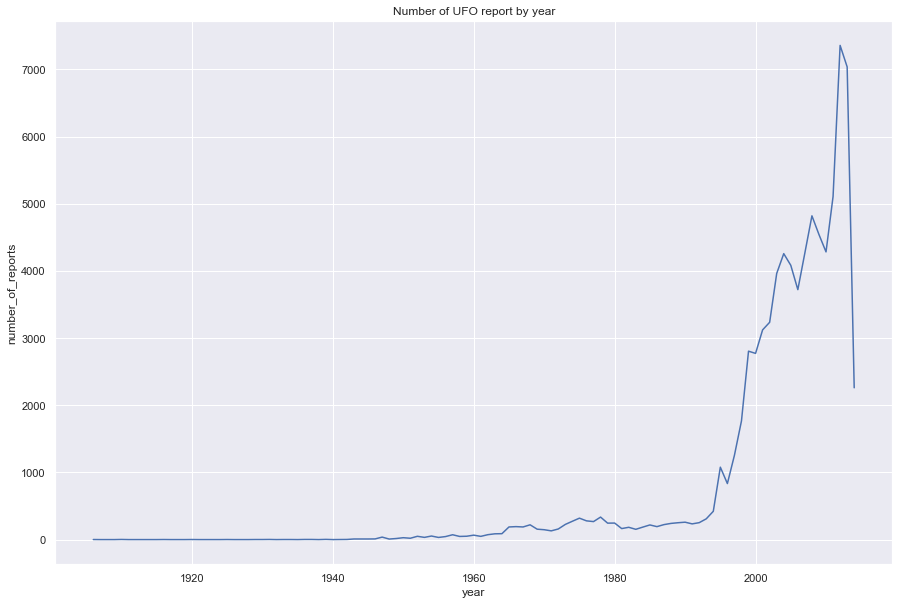

In [9]:
import seaborn as sb

# 7. Write a Pandas program to create a plot to present the number of unidentified flying object (UFO) reports per year.
df7 = pd.DataFrame(df.groupby(pd.Grouper(key='Date_time', axis=0,
                                         freq='AS'))['Date_time'].agg(number_of_reports='count'))
df7['year'] = pd.DatetimeIndex(df7.index).year
df7.set_index(keys='year', inplace=True)
sb.set(rc={"figure.figsize": (15, 10)})
sb.lineplot(data=df7, x='year', y='number_of_reports').set(title='Number of UFO report by year')

In [10]:
# 8. Write a Pandas program to extract year, month, day, hour, minute, second and weekday from unidentified flying object (UFO) reporting date.
df = dt.fread('ufo_sighting_data.csv').to_pandas()
date_columns = ['Date_time', 'date_documented']
for col in date_columns:
    df[col] = pd.to_datetime(df[col].str.replace('24:00', '00:00'))
df = df.dropna(axis=0, subset=['Date_time'])

print(df['Date_time'].dt.year.head())
print(df['Date_time'].dt.month.head())
print(df['Date_time'].dt.day.head())
print(df['Date_time'].dt.hour.head())
print(df['Date_time'].dt.minute.head())
print(df['Date_time'].dt.second.head())
print(df['Date_time'].dt.weekday.head())

0    1949
1    1949
2    1955
3    1956
4    1960
Name: Date_time, dtype: int64
0    10
1    10
2    10
3    10
4    10
Name: Date_time, dtype: int64
0    10
1    10
2    10
3    10
4    10
Name: Date_time, dtype: int64
0    20
1    21
2    17
3    21
4    20
Name: Date_time, dtype: int64
0    30
1     0
2     0
3     0
4     0
Name: Date_time, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Date_time, dtype: int64
0    0
1    0
2    0
3    2
4    0
Name: Date_time, dtype: int64


In [11]:
# 8. Write a Pandas program to extract year, month, day, hour, minute, second and weekday from unidentified flying object (UFO) reporting date.
print(pd.to_datetime((df['Date_time']).head()))
print(df['Date_time'].to_timestamp)

0   1949-10-10 20:30:00
1   1949-10-10 21:00:00
2   1955-10-10 17:00:00
3   1956-10-10 21:00:00
4   1960-10-10 20:00:00
Name: Date_time, dtype: datetime64[ns]
<bound method Series.to_timestamp of 0       1949-10-10 20:30:00
1       1949-10-10 21:00:00
2       1955-10-10 17:00:00
3       1956-10-10 21:00:00
4       1960-10-10 20:00:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: Date_time, Length: 80332, dtype: datetime64[ns]>


In [12]:
# 10. Write a Pandas program to count year-country wise frequency of reporting dates of unidentified flying object(UFO).
df['year'] = df['Date_time'].dt.year
df.groupby(by=['year', 'country'])['city'].agg(number_of_reports='count')

number_of_reports
year country                   
1906                          1
1910 us                       2
1916                          1
1920 us                       1
1925 us                       1
...                         ...
2014 au                      14
     ca                      45
     de                       3
     gb                      21
     us                    1964

[358 rows x 1 columns]

In [13]:
# 11. Write a Pandas program to extract unique reporting dates of unidentified flying object (UFO).
unique_dates = df['Date_time'].dt.date.drop_duplicates().sort_values()
unique_dates

7863     1906-11-11
10580    1910-01-01
46858    1910-06-01
40275    1916-04-05
46694    1920-06-11
            ...    
45601    2014-05-04
45828    2014-05-05
45990    2014-05-06
46143    2014-05-07
46301    2014-05-08
Name: Date_time, Length: 10525, dtype: object

In [14]:
# 12. Write a Pandas program to get the difference (in days) between documented date and reporting date of unidentified flying object (UFO).
(df['date_documented'] - df['Date_time']).head()

0   19922 days 03:30:00
1   20520 days 03:00:00
2   19095 days 07:00:00
3   17264 days 03:00:00
4   15808 days 04:00:00
dtype: timedelta64[ns]

In [15]:
# 13. Write a Pandas program to add 100 days with reporting date of unidentified flying object (UFO).
df['date_documented'].dt.date + pd.Timedelta(days=100)

0        2004-08-05
1        2006-03-26
2        2008-04-30
3        2004-04-26
4        2004-05-01
            ...    
80327    2014-01-08
80328    2014-01-08
80329    2014-01-08
80330    2014-01-08
80331    2014-01-08
Name: date_documented, Length: 80332, dtype: object

In [16]:
# 14. Write a Pandas program to generate sequences of fixed-frequency dates and time spans.
pd.date_range(start='1987-11-18', end='2021-11-29', freq='BM')

DatetimeIndex(['1987-11-30', '1987-12-31', '1988-01-29', '1988-02-29',
               '1988-03-31', '1988-04-29', '1988-05-31', '1988-06-30',
               '1988-07-29', '1988-08-31',
               ...
               '2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-30', '2021-08-31',
               '2021-09-30', '2021-10-29'],
              dtype='datetime64[ns]', length=408, freq='BM')

In [17]:
# 15. Write a Pandas program to create a conversion between strings and datetime.
print(pd.to_datetime('1991-12-24'), pd.to_datetime('1991-12-24').strftime('%d/%m/%Y'))

1991-12-24 00:00:00 24/12/1991


In [18]:
# 16. Write a Pandas program to manipulate and convert date times with timezone information.
df.set_index(keys='Date_time', inplace=True)
df.index = df.index.tz_localize('GMT')
df.index = df.index.tz_convert('Asia/Kolkata')
df.head()

,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,year
Date_time,,,,,,,,,,,
1949-10-11 02:00:00+05:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949
1949-10-11 02:30:00+05:30,lackland afb,tx,,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210000000003,-98.581082,1949
1955-10-10 22:30:00+05:30,chester (uk/england),,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955
1956-10-11 02:30:00+05:30,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956
1960-10-11 01:30:00+05:30,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960


In [23]:
# 17. Write a Pandas program to get the average mean of the UFO (unidentified flying object) sighting was reported.
df['date_documented'].mean()

Timestamp('2007-07-28 02:15:17.074142464')